Data Shape: (1797, 64)
Label Shape: (1797,)


<Figure size 640x480 with 0 Axes>

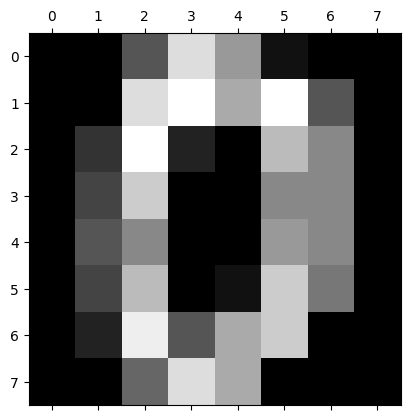

Label of the first digit: 0
Optimal number of clusters: 2


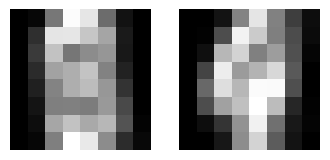

Silhouette Score for optimal clusters: 0.15650428381697654


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Load the dataset
digits = load_digits()

# Print the shape of the dataset
print("Data Shape:", digits.data.shape)
print("Label Shape:", digits.target.shape)

# Display the first digit
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Print the label of the first digit
print("Label of the first digit:", digits.target[0])

# Step 1: Preprocessing - Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(digits.data)

# Step 2: Find optimal number of clusters for GMM
# Trying different cluster counts (from 2 to 20)
n_clusters = np.arange(2, 21)
silhouette_scores = []

for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(data_scaled)
    labels = gmm.predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Find the optimal number of clusters based on silhouette score
optimal_clusters = n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

# Step 3: Apply GMM with optimal number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, random_state=0)
gmm.fit(data_scaled)
labels = gmm.predict(data_scaled)

# Step 4: Visualization of the clustering results
# We will visualize the centroids of clusters in the form of digit images
# Since centroids are in the scaled space, we need to inverse transform them
centroids = scaler.inverse_transform(gmm.means_)

fig, ax = plt.subplots(1, optimal_clusters, figsize=(optimal_clusters * 2, 2))
for i in range(optimal_clusters):
    ax[i].imshow(centroids[i].reshape(8, 8), cmap='gray')
    ax[i].axis('off')

plt.show()

# Step 5: Evaluate the model performance
print("Silhouette Score for optimal clusters:", silhouette_scores[np.argmax(silhouette_scores)])
